# DeepSVDD  -  Deep One-Class Classification for outlier detection
### Deep One-Class Classifier with AutoEncoder (AE) is a type of neural networks for learning useful data representations in an unsupervised way. DeepSVDD trains a neural network while minimizing the volume of a hypersphere that encloses the network representations of the data, forcing the network to extract the common factors of variation. Similar to PCA, DeepSVDD could be used to detect outlying objects in the data by calculating the distance from center
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.deep_svdd

### Arguments that work with DeepSVDD  algorithm:
1. c=c,
2. use_ae=use_ae,
3. hidden_neurons
4. hidden_activation
5. output_activation
6. optimizer
7. epochs
8. batch_size
9. dropout_rate
10. l2_regularizer
11. validation_size
12. preprocessing
13. verbose
14. random_state
15. contamination

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [3]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
histograms = O.Features.get_features(imgs, feature_type="hist", norm_type="minmax")

get2D                    ...took    42.387845 seconds


2022-09-01 20:09:05.123381: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 20:09:06.589863: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-09-01 20:09:06.684931: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-09-01 20:09:06.684977: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-09-01 20:09:06.688023: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-09-01 20:09:06.688064: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.1

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16384     
_________________________________________________________________
net_output (Dense)           (None, 32)                2048      
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 32)                0         
_________________________________________________________________
tf.math.pow_1 (TFOpLambda)   (None, 32)                0         
_________________________________________________________________
tf.math.reduce_sum_1 (TFOpLa (None,)                   0         
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL ()                        0   

Epoch 68/100
3/3 [==============================] - 0s 14ms/step - loss: 1.1347 - val_loss: 20.7250
Epoch 69/100
3/3 [==============================] - 0s 10ms/step - loss: 1.1156 - val_loss: 20.9752
Epoch 70/100
3/3 [==============================] - 0s 30ms/step - loss: 1.0984 - val_loss: 21.2864
Epoch 71/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0783 - val_loss: 21.6676
Epoch 72/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0667 - val_loss: 21.9703
Epoch 73/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0641 - val_loss: 22.2617
Epoch 74/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0428 - val_loss: 22.5297
Epoch 75/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0324 - val_loss: 22.7932
Epoch 76/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0153 - val_loss: 23.1364
Epoch 77/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0034 - val_loss: 23.5079


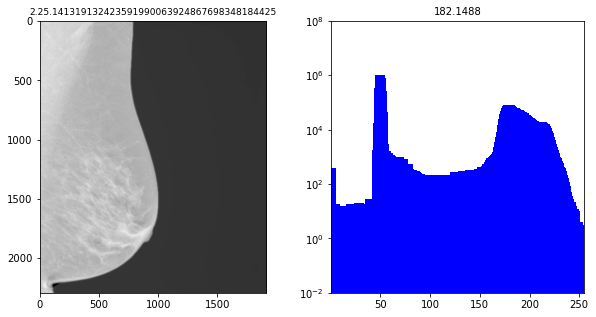

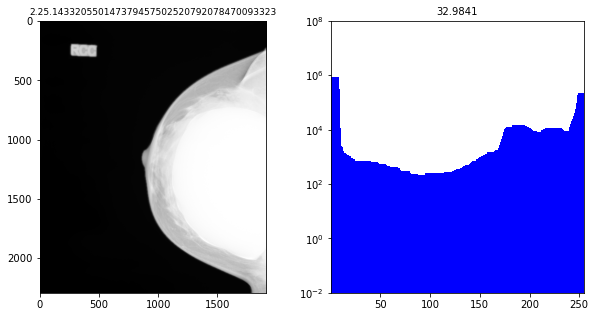

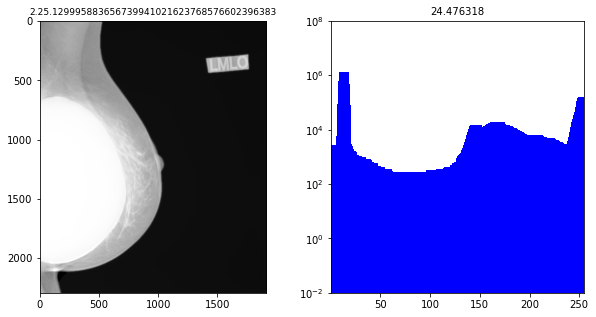

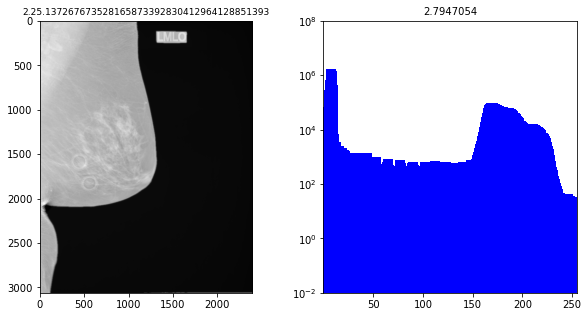

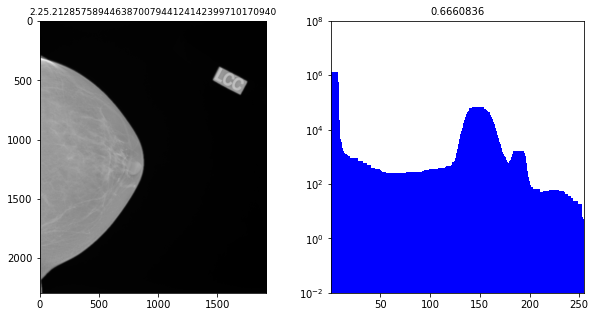

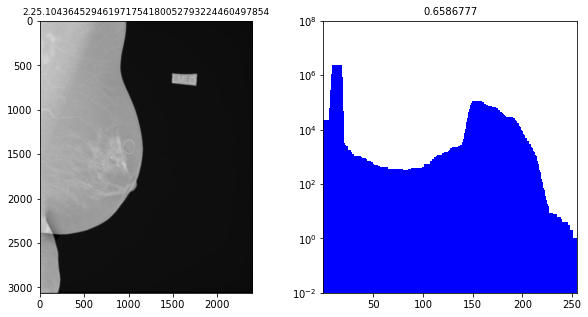

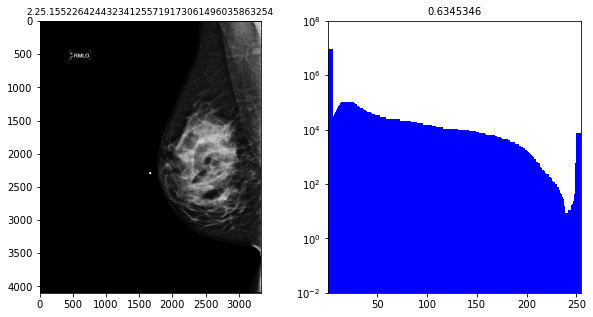

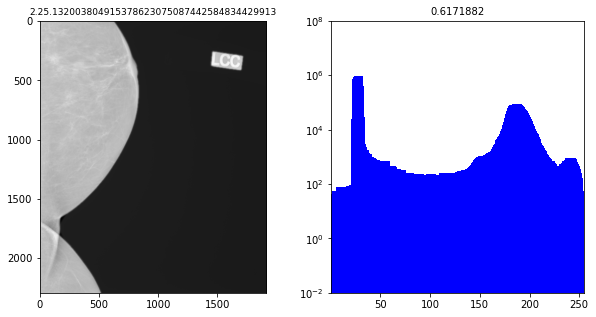

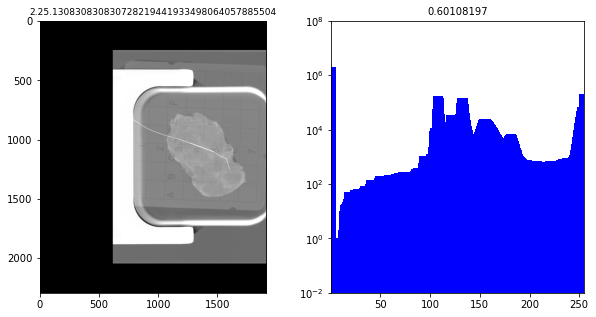

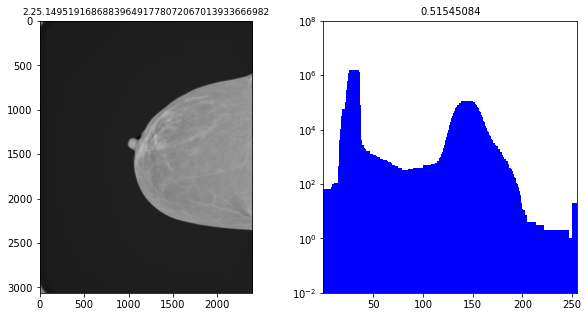

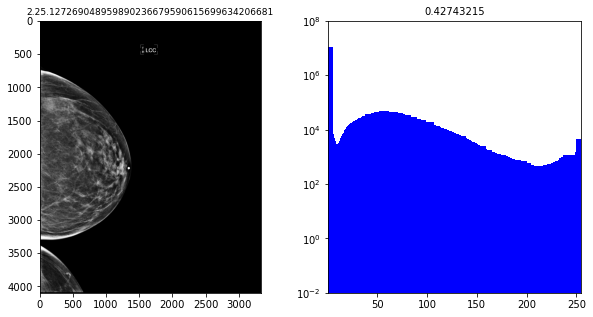

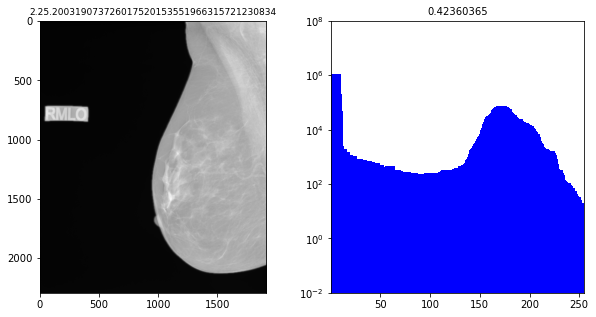

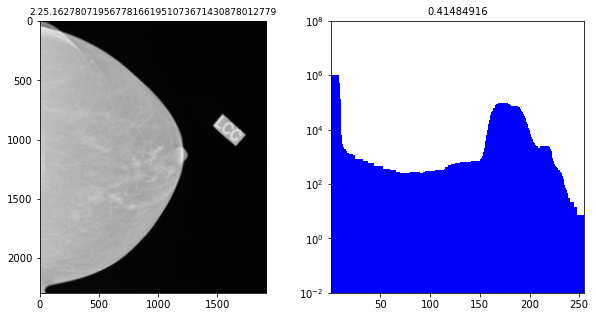

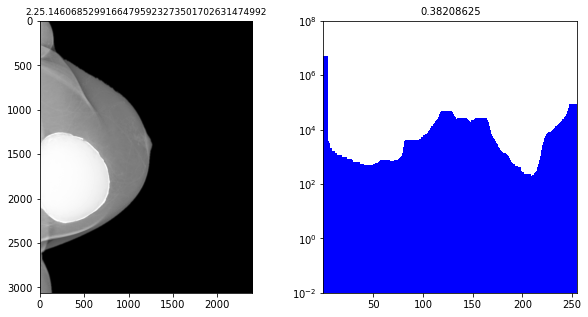

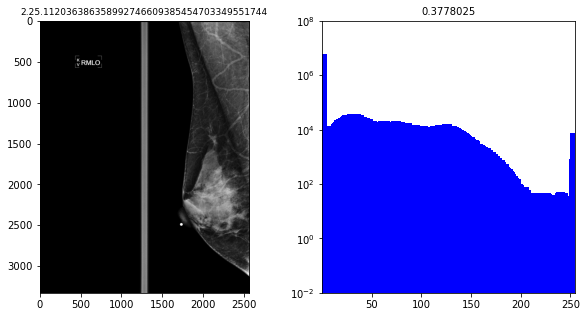

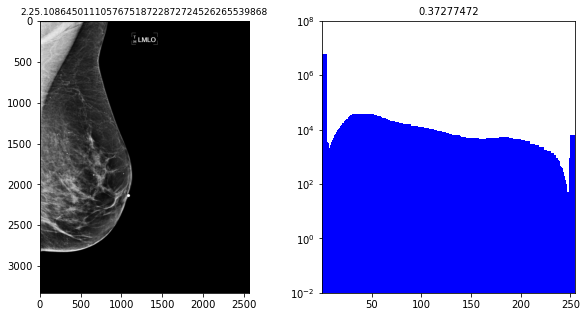

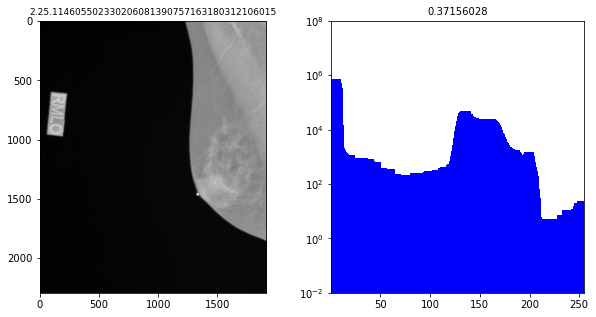

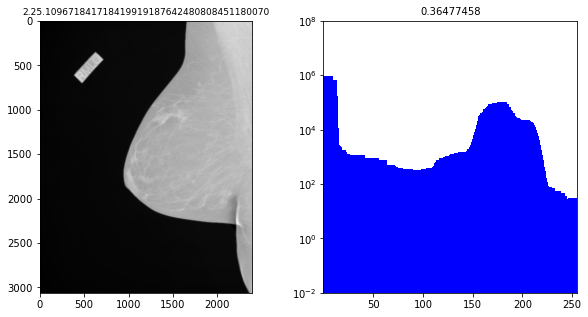

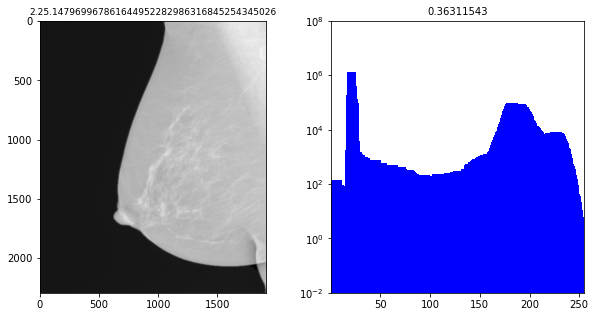

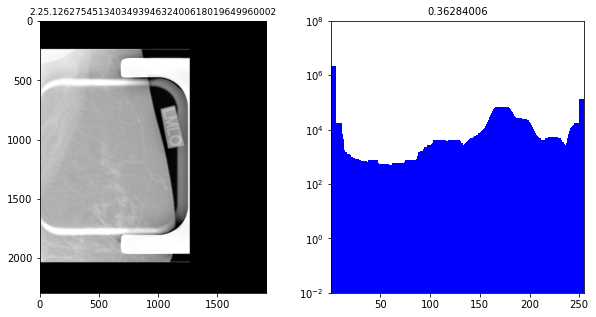

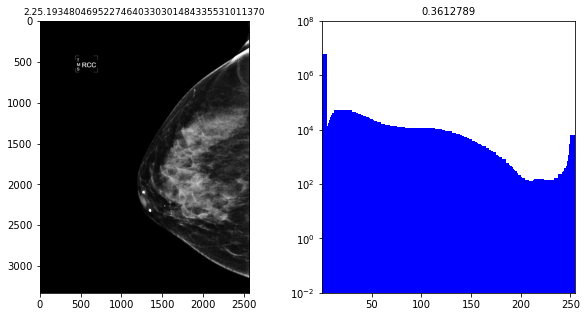

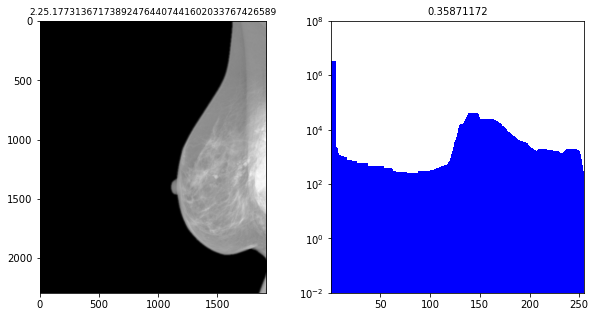

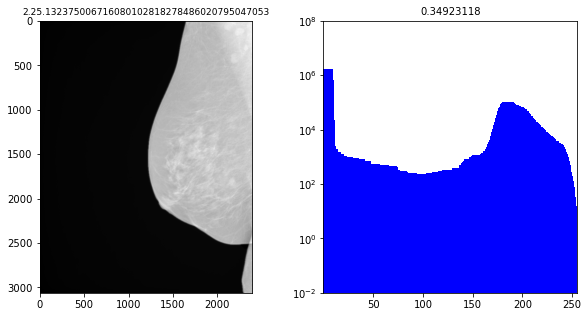

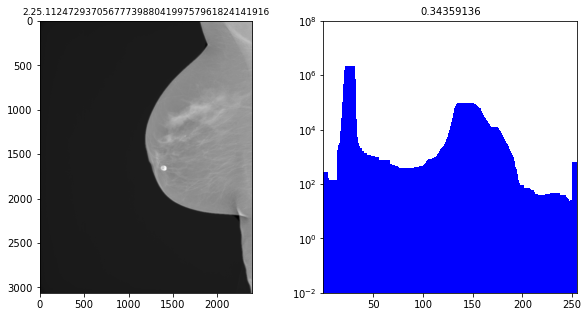

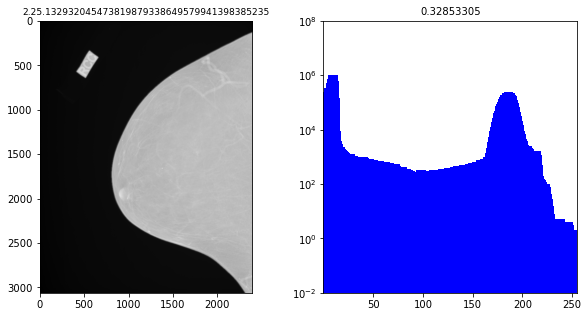

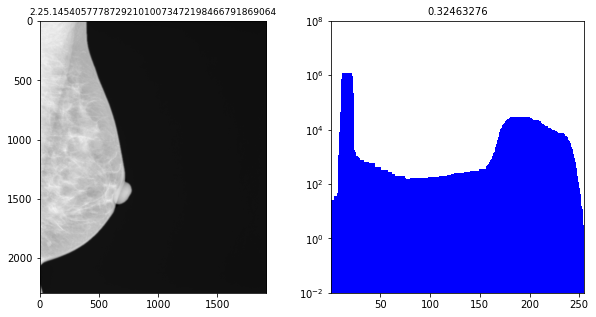

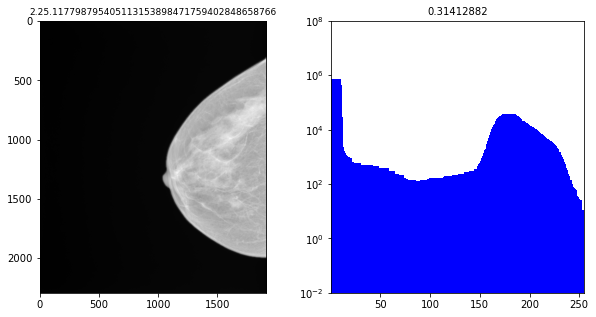

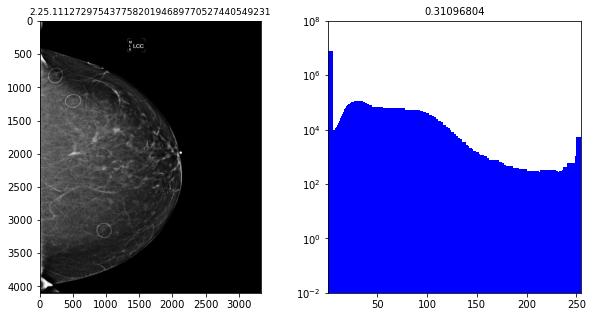

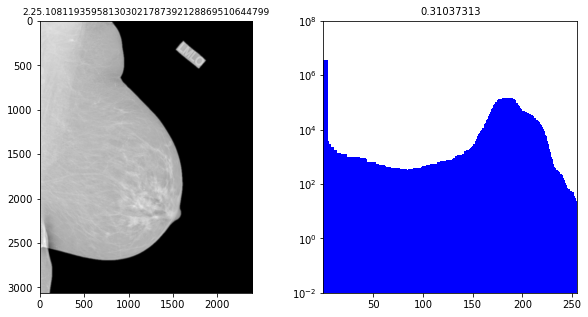

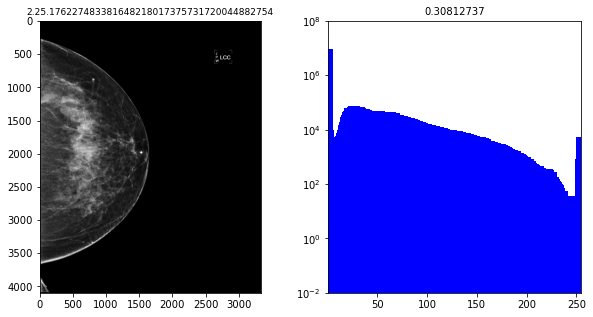

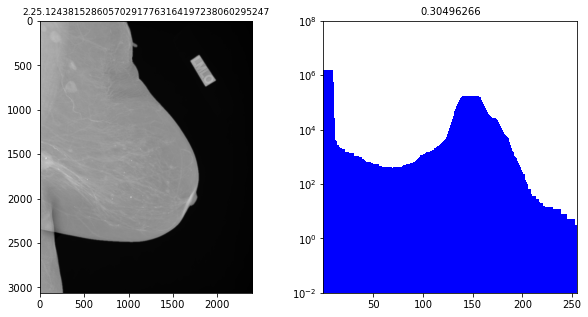

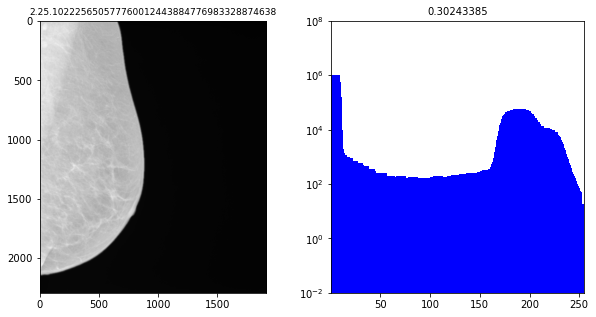

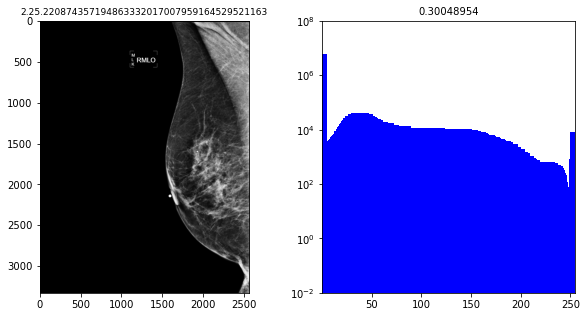

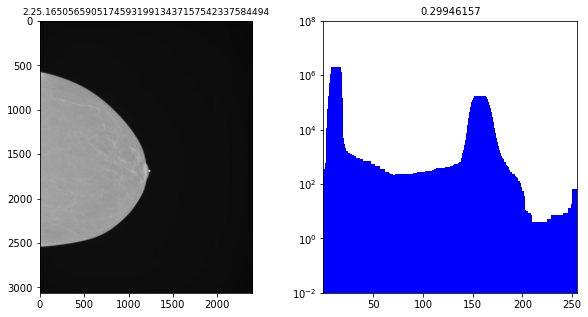

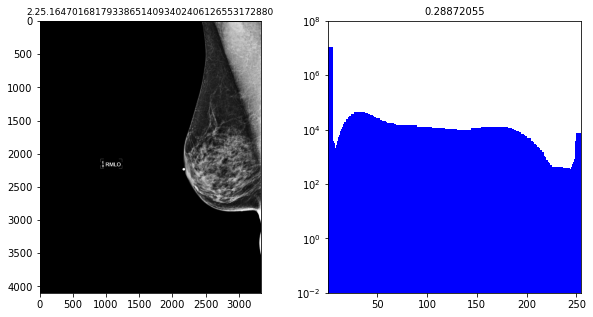

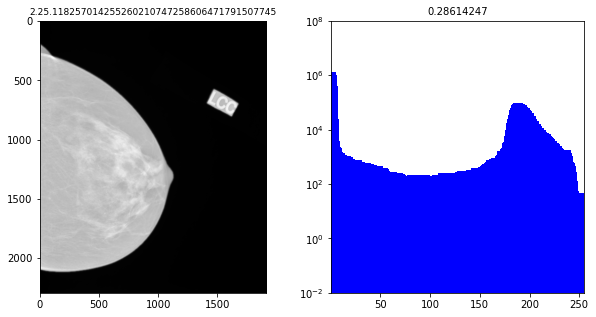

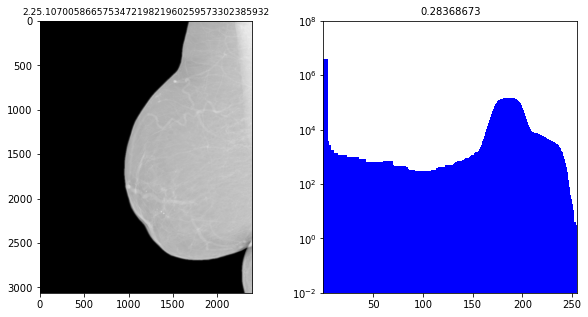

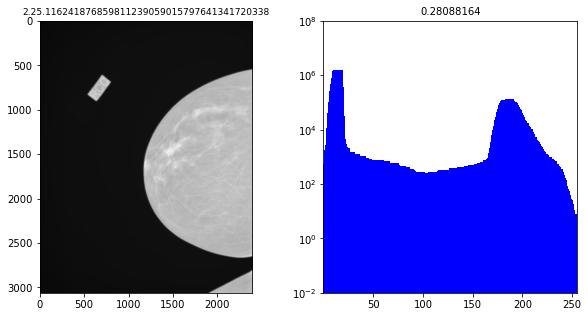

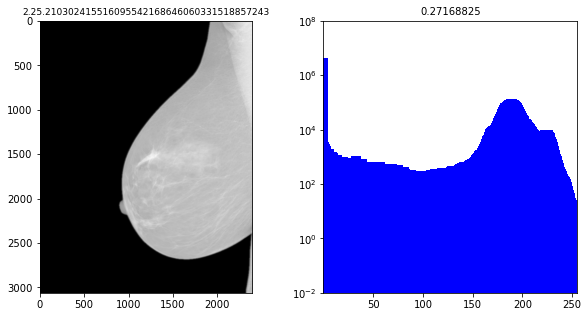

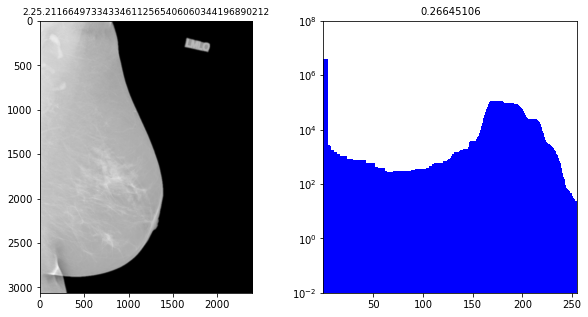

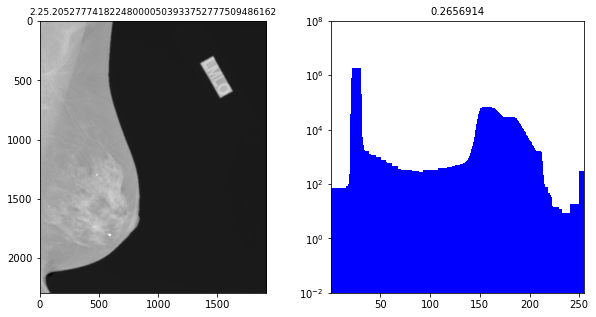

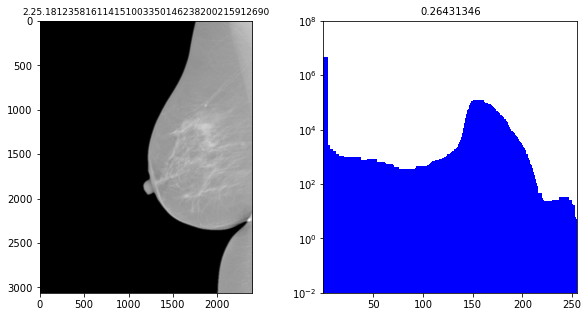

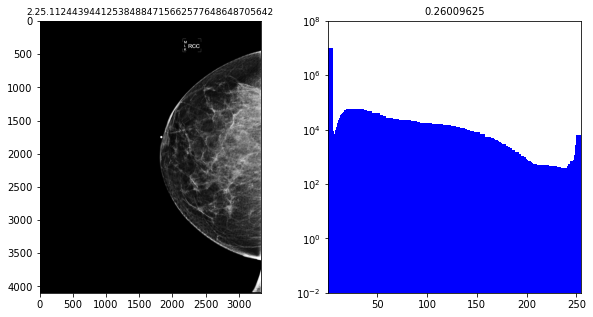

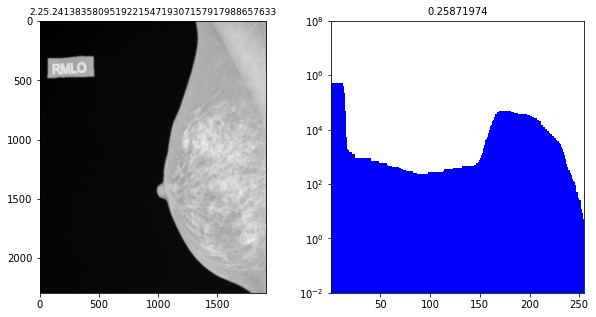

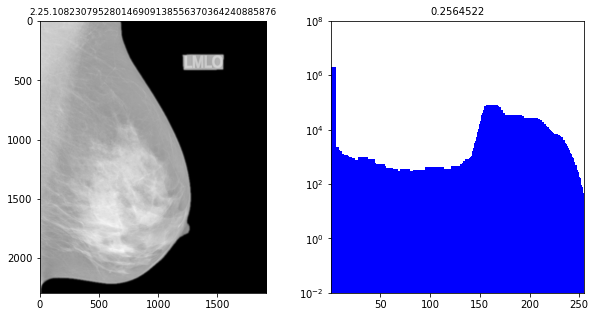

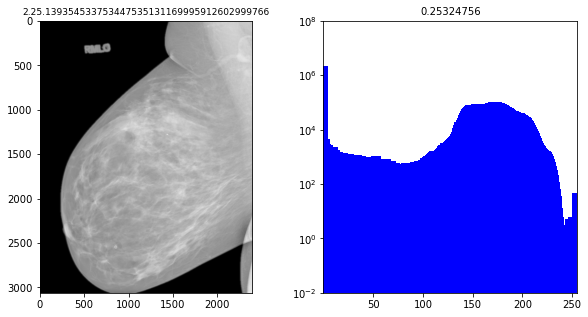

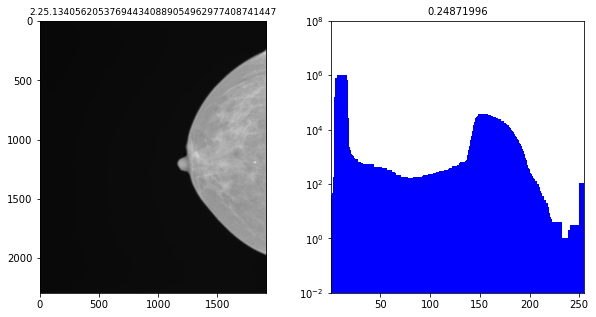

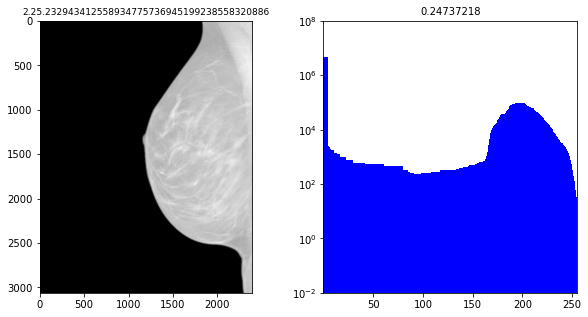

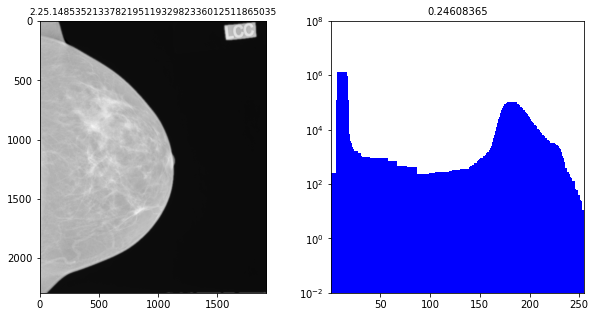

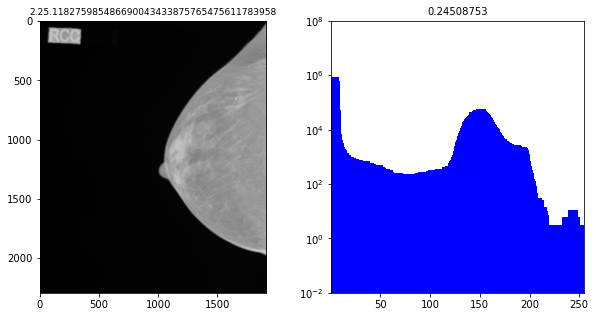

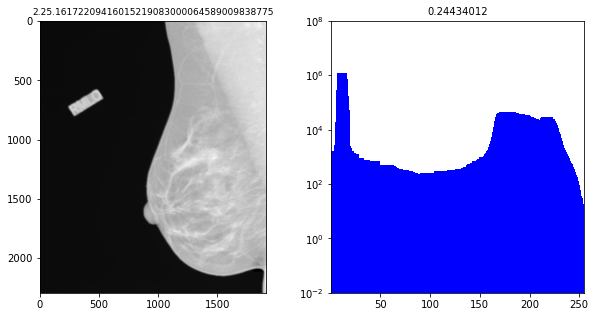

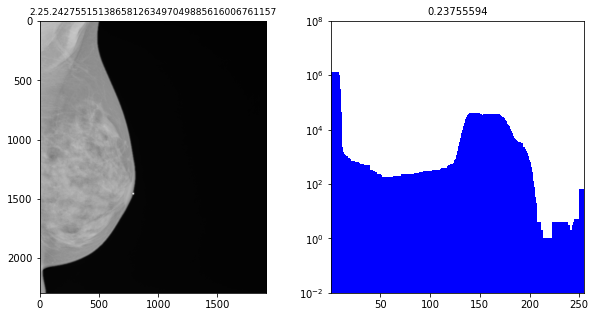

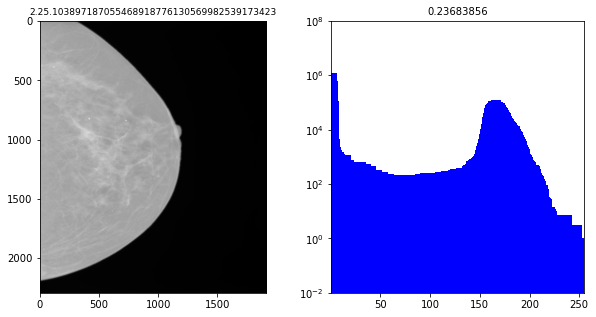

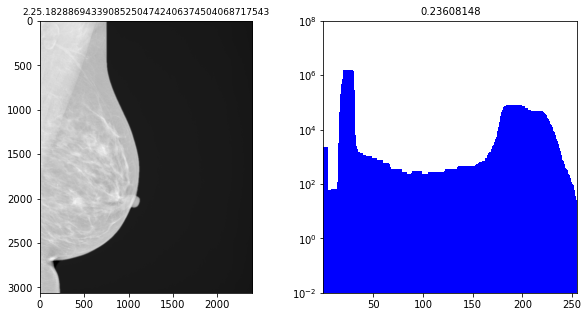

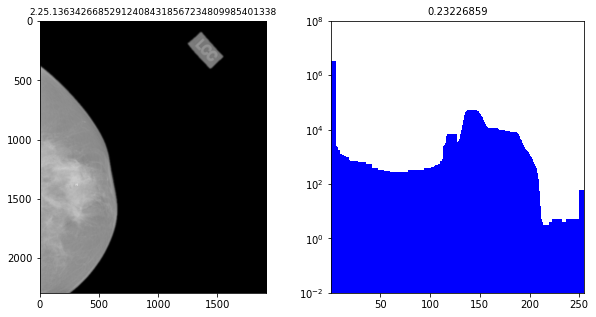

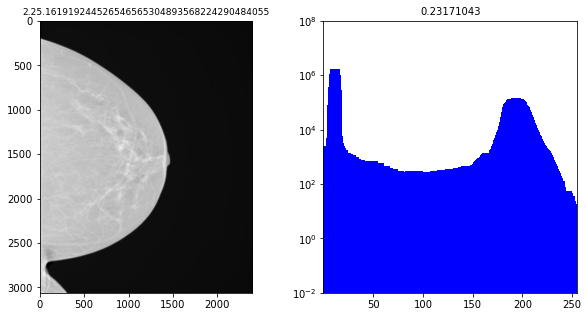

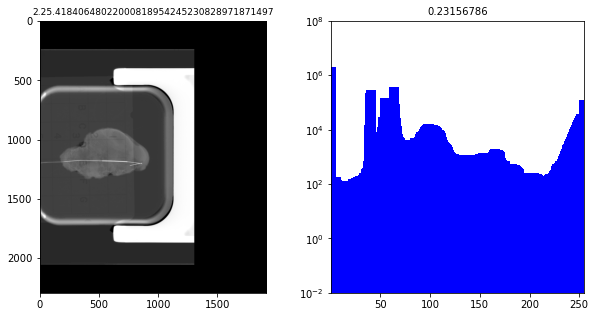

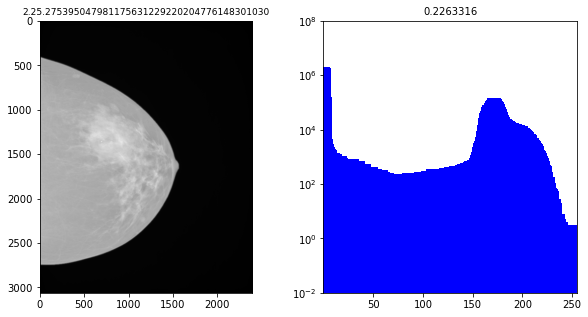

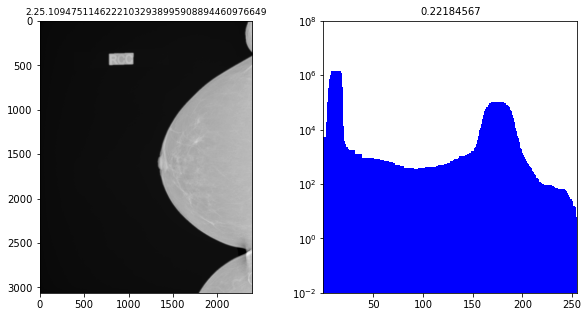

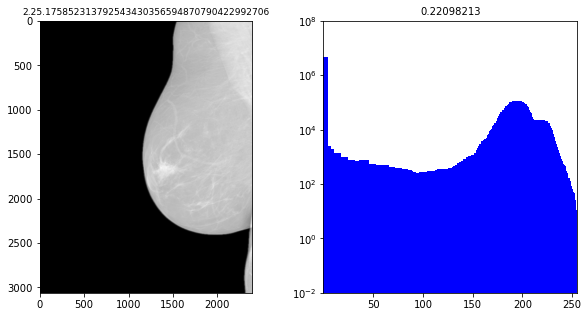

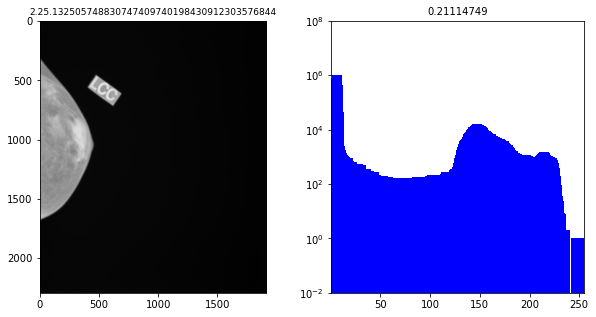

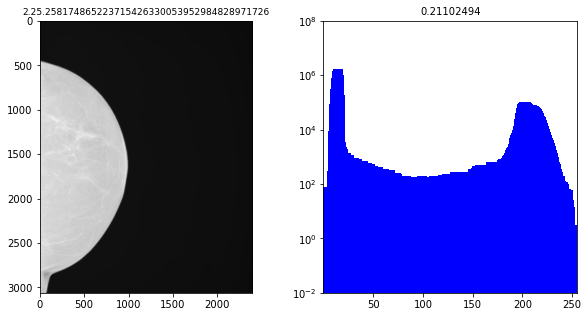

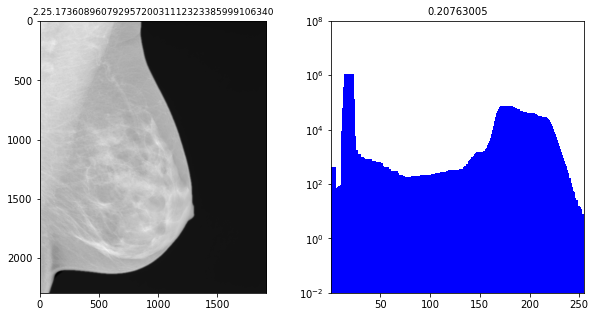

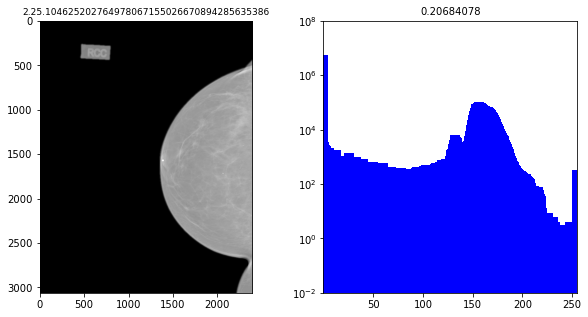

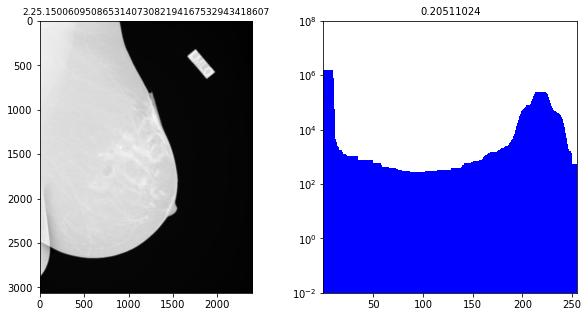

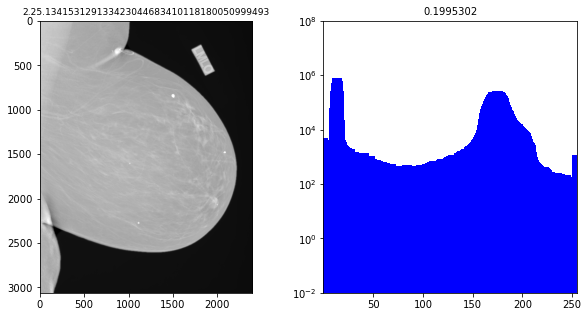

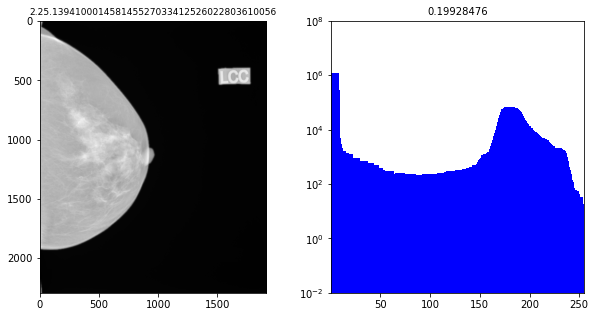

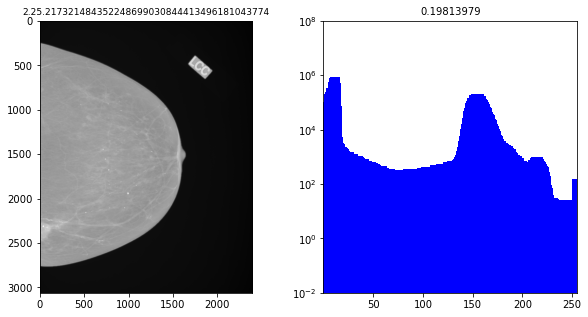

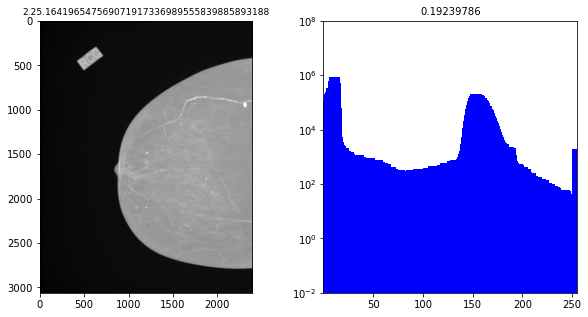

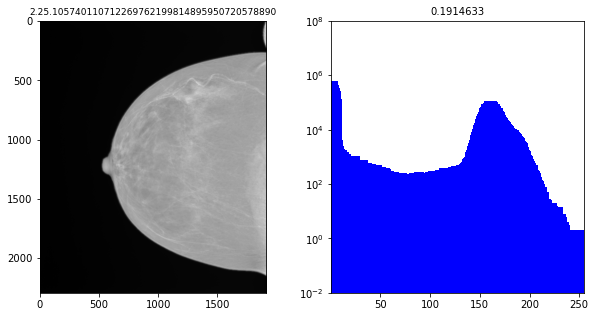

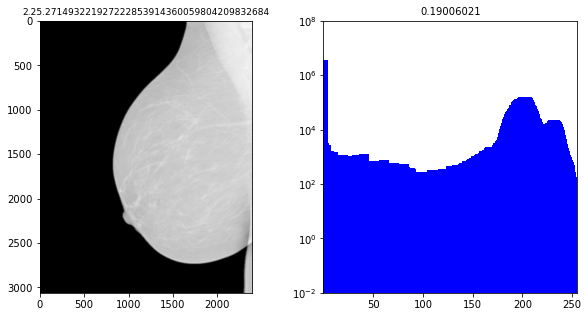

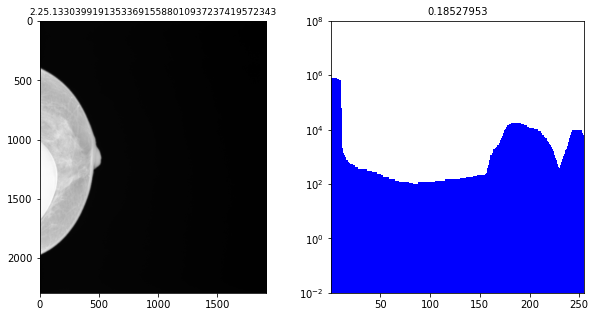

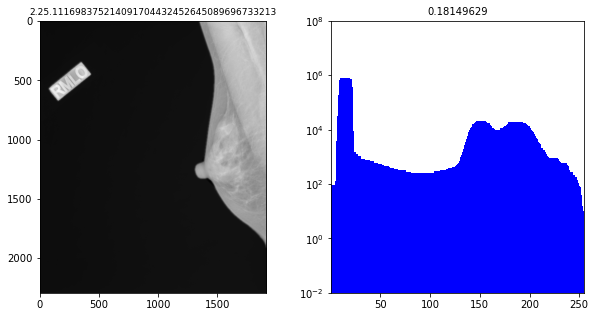

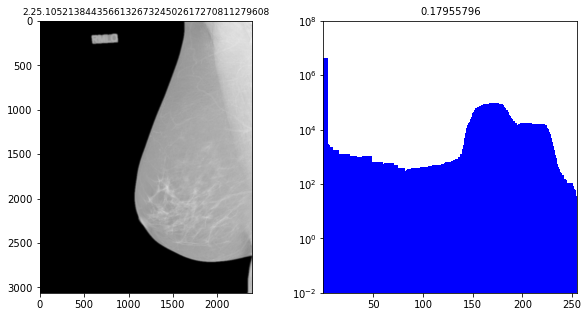

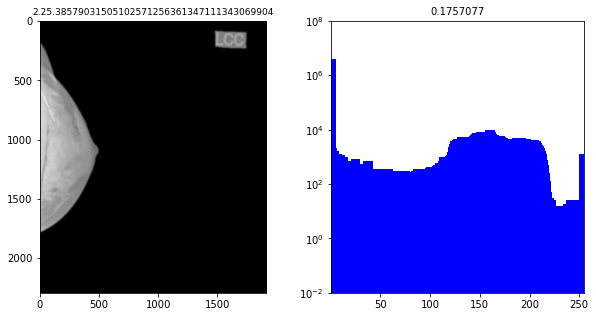

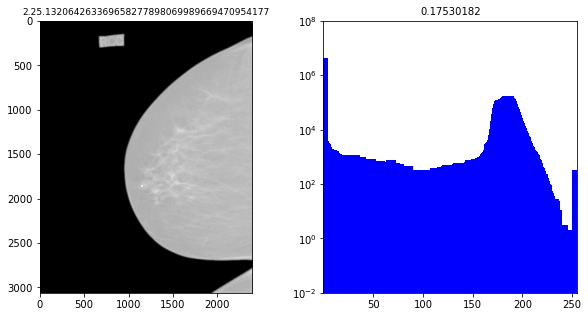

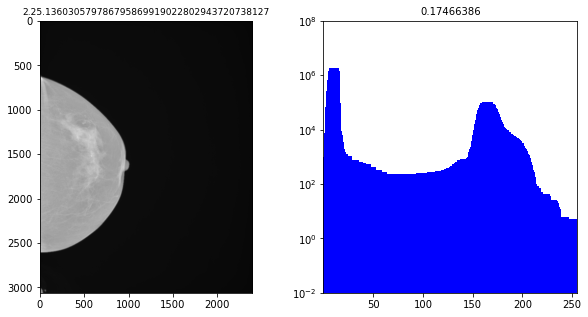

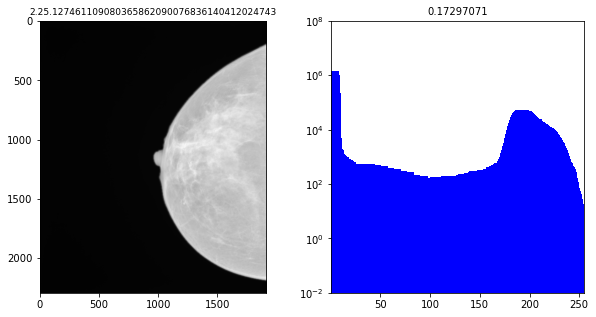

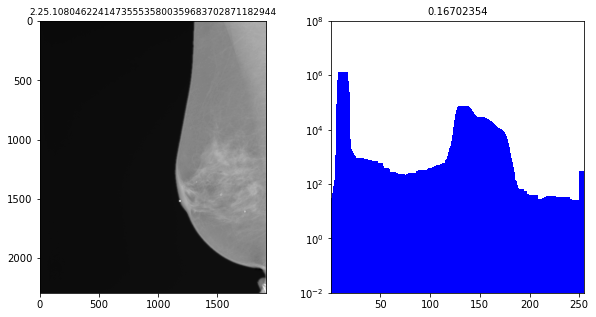

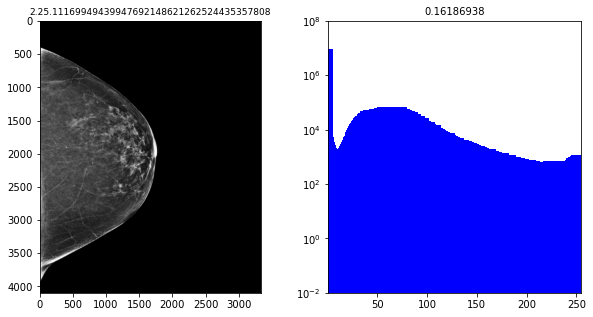

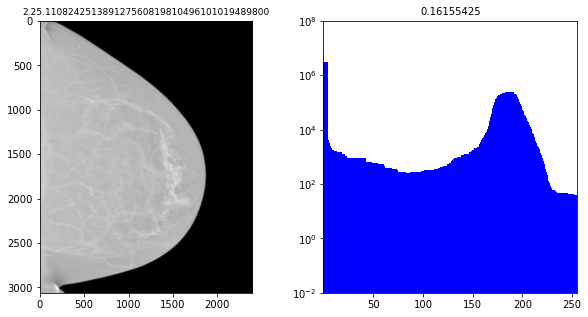

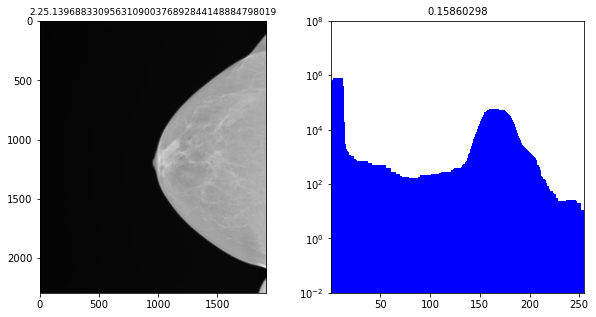

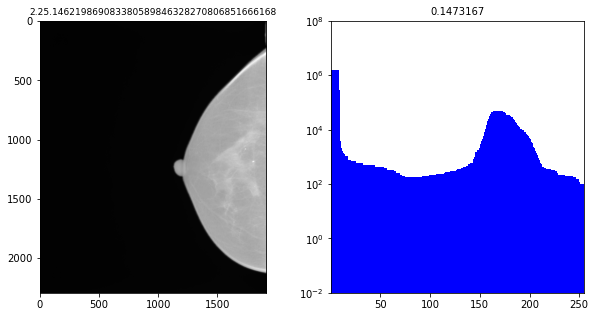

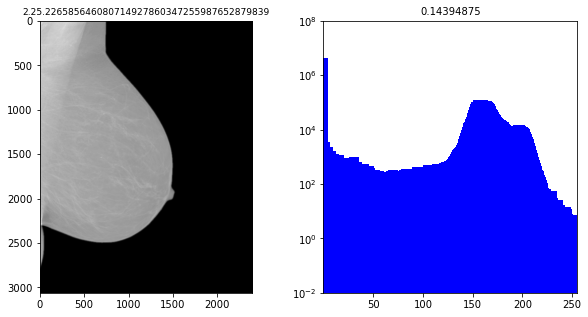

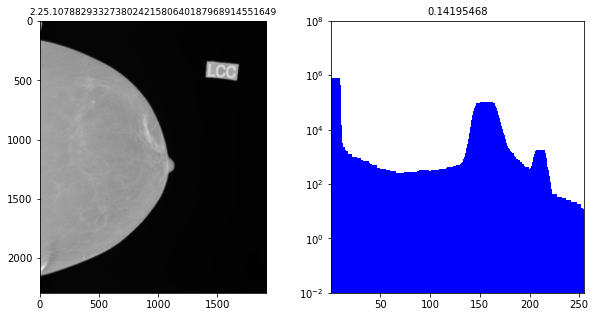

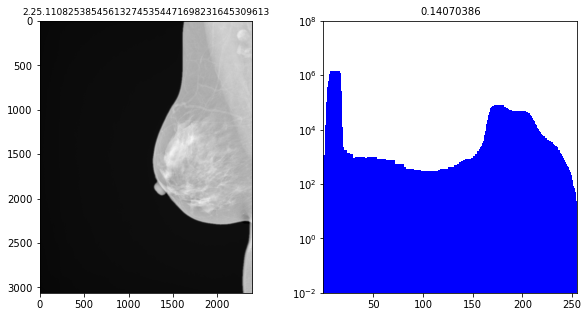

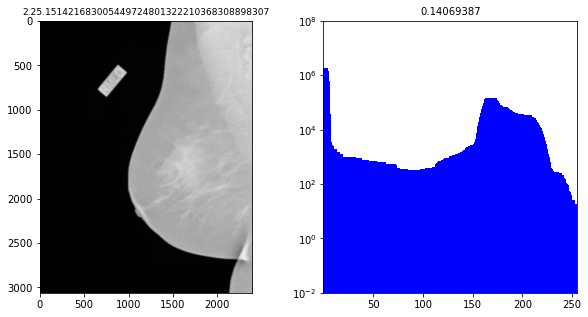

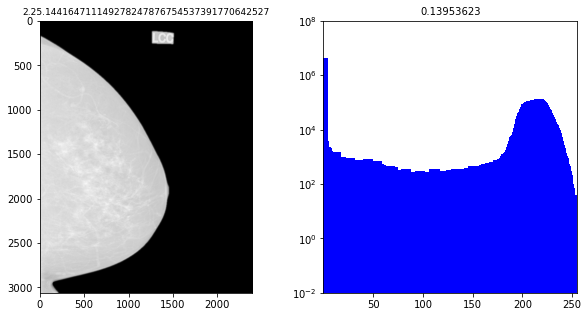

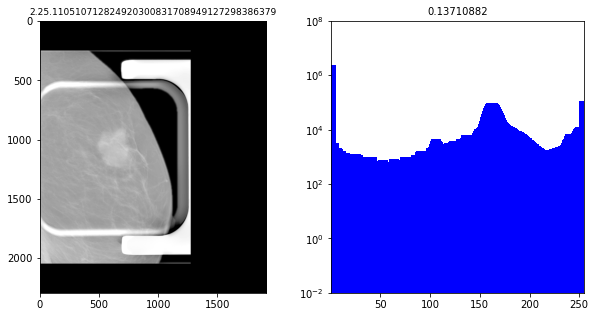

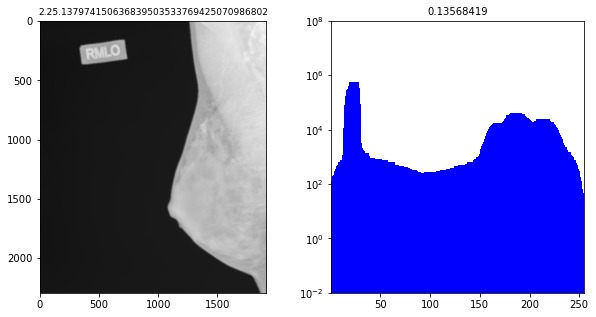

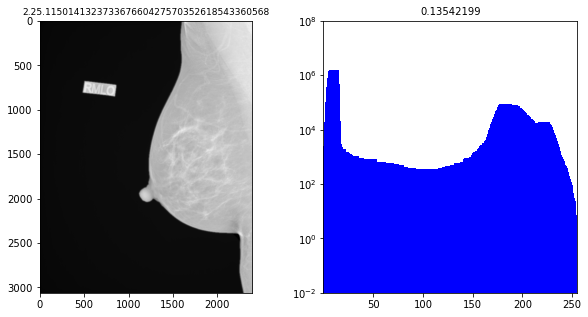

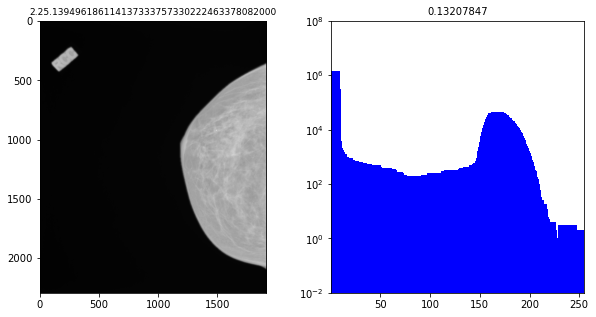

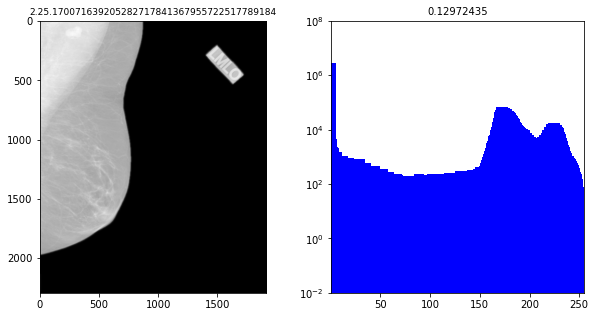

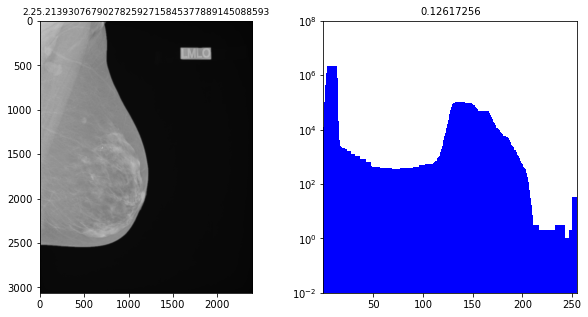

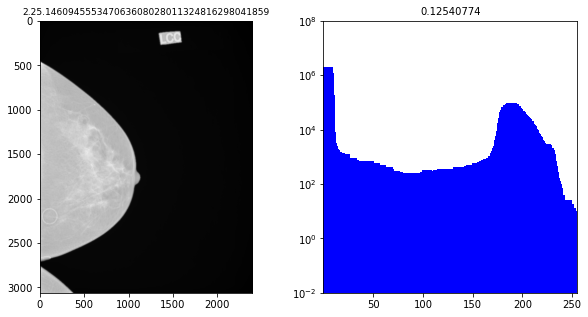

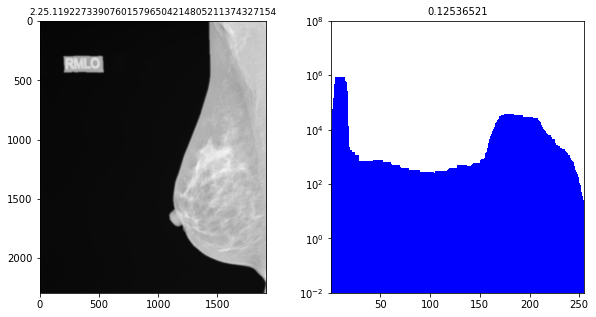

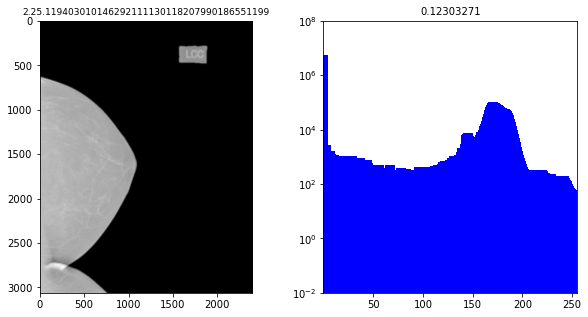

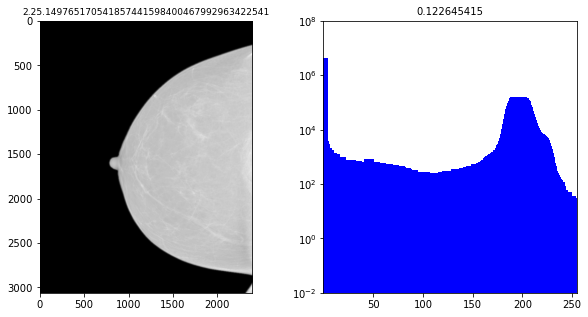

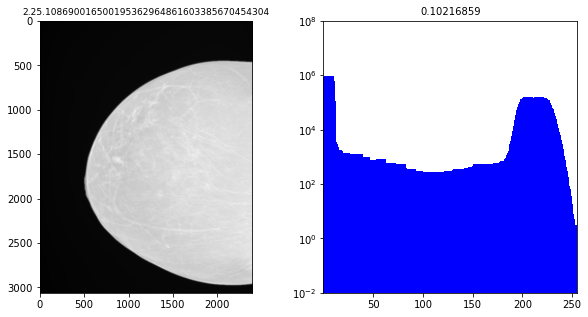

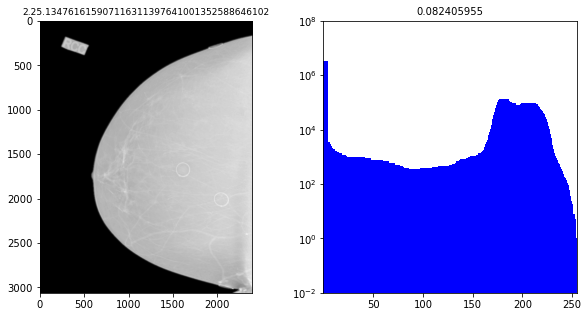

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(histograms, pyod_algorithm='DeepSVDD')
O.Features.view_image_and_features(imgs, ['hist'], train_scores=[train_scoresX])